In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=5000, n_features = 2, 
                                              noise = 5, coef = True, random_state = 2)

### Градиентный спуск

In [49]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [50]:
# инициализируем начальный вектор весов
w = np.zeros(2) # Это частный случай
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors_g = []
 
# шаг градиентного спуска
eta = 0.05
 
# максимальное число итераций
max_iter = 1e4
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
# lamb = 0.01 
# np.random.seed(1234)
  
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки

    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_g.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 34.0428


In [51]:
# # Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
# plt.figure(figsize=(13, 6))
# plt.title('Stochastic gradient descent')
# plt.xlabel('t')
# plt.ylabel('Q')

# plt.plot(Q)



# plt.show()

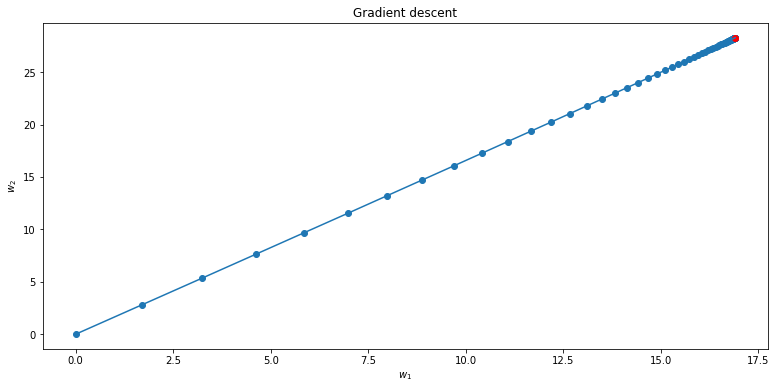

In [52]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

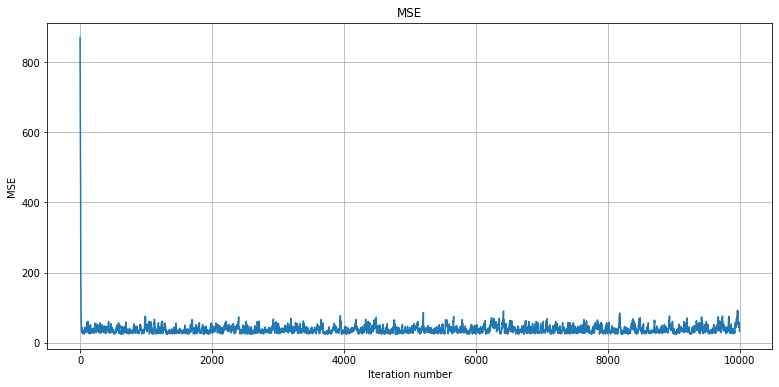

In [53]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.grid(True)

### Стохастический градиентный спуск

In [54]:
# инициализируем начальный вектор весов
w = np.zeros(2) # Это частный случай
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors_2 = []
 
# шаг градиентного спуска
eta = 0.05
 
# максимальное число итераций
max_iter = 1e4
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
lamb = 0.01 
np.random.seed(1234)
Q = [np.sum((np.dot(data, w) - target)**2)]  
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind]))
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())

    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(data[train_ind], w) - target[train_ind])**2)
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 34.0428


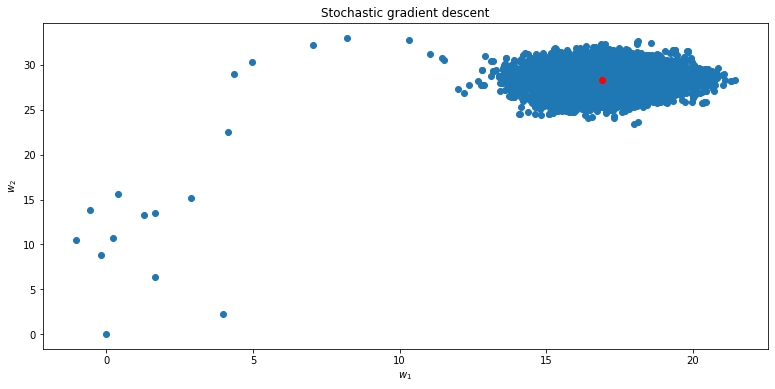

In [55]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
# plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

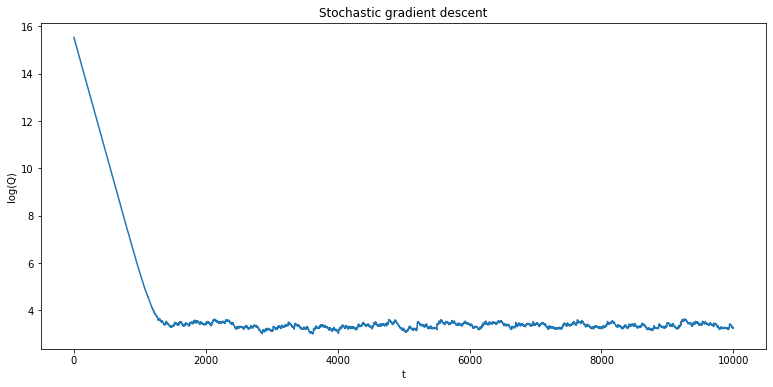

In [56]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel('t')
plt.ylabel('log(Q)')

plt.plot(np.log(Q))



plt.show()

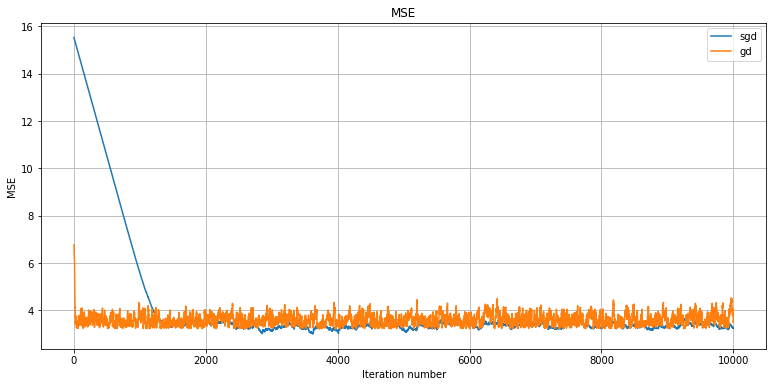

In [57]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(Q)), np.log(Q), label = 'sgd')
plt.plot(range(len(errors)), np.log(errors), label = 'gd')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

Градиентный спуск (GD) обходит стохастический GD по сходимости: 
GD достигает сходимости, примерно на 30 итерации, а SGD примерно на 1400-ой.

## Задание 2

In [67]:
# инициализируем начальный вектор весов
w = np.zeros(2) # Это частный случай
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors = []
 
# шаг градиентного спуска
eta = 0.0015
 
# максимальное число итераций
max_iter = 1e4
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
lamb = 0.1 

q = 1e-2
np.random.seed(1234)

QL2 = [np.sum((np.dot(data, w) - target)**2)]  
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) - 2 * eta * q *(w)
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    QL2.append(QL2[-1]*(1-lamb)+lamb*((np.dot(data[train_ind], w) - target[train_ind])**2 + q *np.sum(np.square(w))))
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 25.8348


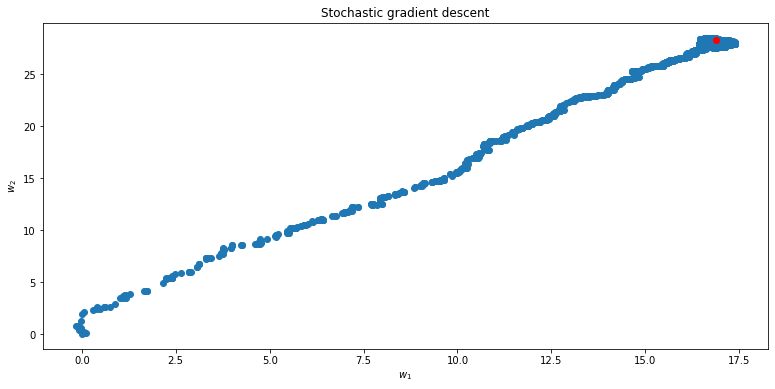

In [68]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
# plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

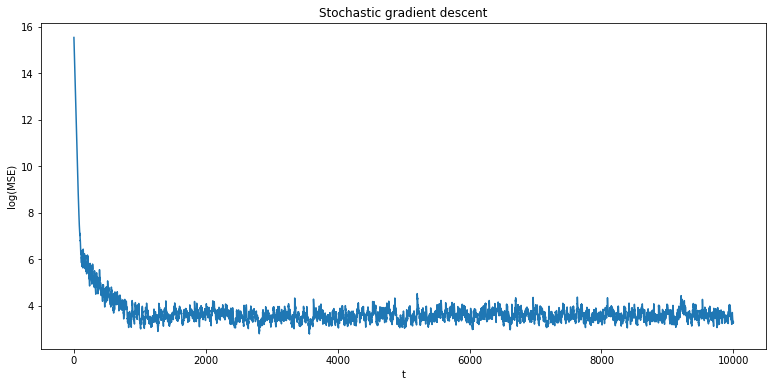

In [69]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel('t')
plt.plot(np.log(QL2))
plt.ylabel('log(MSE)')


plt.show()

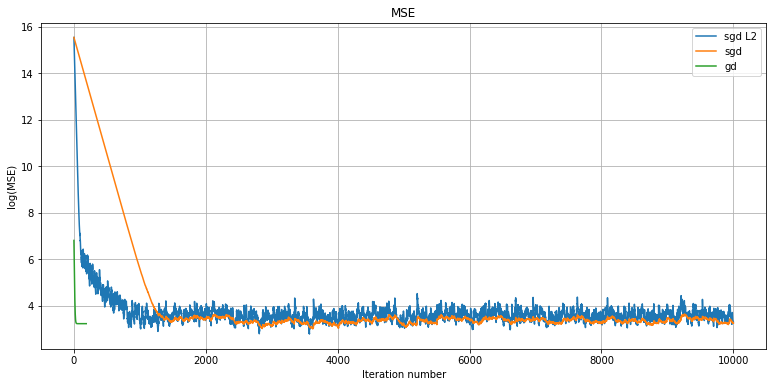

In [70]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(QL2)), np.log(QL2), label = 'sgd L2')
plt.plot(range(len(Q)), np.log(Q), label = 'sgd')

plt.plot(range(len(errors_g)), np.log(errors_g), label = 'gd')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('log(MSE)')
plt.legend()
plt.grid(True)

L-2 регуляризация ускорила сходимость SGD (понадобилось менее 1000 итераций)